# Ładowanie pakietow

In [2]:
library(arrow)
library(tzdb)
library(pheatmap)
library(MASS)
library(ca)
library(RColorBrewer)
library(FactoMineR)
library(factoextra)


Dołączanie pakietu: 'arrow'


Następujący obiekt został zakryty z 'package:utils':

    timestamp


Ładowanie wymaganego pakietu: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [17]:
path_X = "C:/Users/szym3n/Desktop/Praca licencjacka/SEASON_2021_2022/X_forecast_1_2021_2022.parquet"
path_Y = "C:/Users/szym3n/Desktop/Praca licencjacka/SEASON_2021_2022/y_farms_forecast_1_2021_2022.parquet"
X = read_parquet(path_X)
Y = read_parquet(path_Y)
X = as.data.frame(X[,1:62])



In [64]:
# Lista wybranych kolumn
selected_columns <- c('10m_dir_E','10m_dir_N', 'grid_id',
                      '10m_dir_NE','10m_dir_NW','10m_dir_S','10m_dir_SE','10m_dir_SW','10m_dir_W')

# Wybierz tylko wybrane kolumny
dane <- X[selected_columns]

# Zamień wartości logiczne na 0/1 za pomocą ifelse()
#dane <- data.frame(lapply(dane, function(x) ifelse(x, 1, 0)))



#dane <- aggregate(. ~ grid_id, data = dane, sum)
#row.names(dane) = dane$grid_id
dane = dane[1:50,2:9]
dane


,10m_dir_N,grid_id,10m_dir_NE,10m_dir_NW,10m_dir_S,10m_dir_SE,10m_dir_SW,10m_dir_W
,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,FALSE,6,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
2,FALSE,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
3,FALSE,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,FALSE,6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,6,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,FALSE,6,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
7,FALSE,6,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
8,FALSE,6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
9,TRUE,6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


## Sumowanie wierszy, aby uproscic zbiór

In [53]:
dane_sumowane <- sapply(seq(1, nrow(dane), by = 100), function(i) {
  sum(dane[i:min(i+99, nrow(dane)), ])
})
dane_sumowane

[1] 18250

10m_dir_E  10m_dir_N 10m_dir_NE 10m_dir_NW  10m_dir_S 10m_dir_SE 10m_dir_SW 
      1284       1498       1356       2085       1693       1885       3464 
 10m_dir_W 
      4985

,10m_dir_E,10m_dir_N,10m_dir_NE,10m_dir_NW,10m_dir_S,10m_dir_SE,10m_dir_SW,10m_dir_W
6,29,18,42,43,28,34,70,101
7,22,19,42,43,29,37,70,103
8,22,19,42,43,29,37,70,103
9,18,25,34,42,33,41,71,101
10,22,30,31,36,31,39,71,105
11,22,30,31,36,31,39,71,105


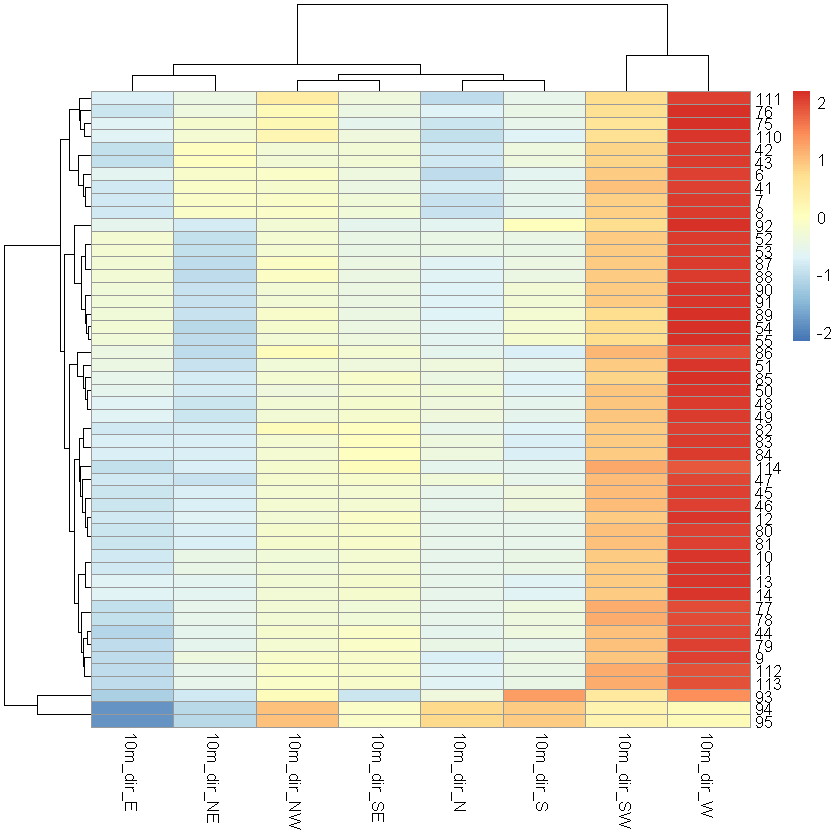

In [54]:
dane = as.matrix(dane)
colSums(dane)
head(dane)
pheatmap(dane, scale = "row")

In [55]:
chisq.test(dane)


	Pearson's Chi-squared test

data:  dane
X-squared = 663.47, df = 343, p-value < 2.2e-16


,10m_dir_E,10m_dir_N,10m_dir_NE,10m_dir_NW,10m_dir_S,10m_dir_SE,10m_dir_SW,10m_dir_W
6,0.004849636,-1.617442e-02,0.021150793,0.0014901977,-0.007454572,-0.0044606651,0.0006403201,0.0009637499
7,-0.005375500,-1.482205e-02,0.021150793,0.0014901977,-0.006182461,-0.0008439096,0.0006403201,0.0024464420
8,-0.005375500,-1.482205e-02,0.021150793,0.0014901977,-0.006182461,-0.0008439096,0.0006403201,0.0024464420
9,-0.011218435,-6.707788e-03,0.009779399,0.0003438918,-0.001094016,0.0039784310,0.0015296535,0.0009637499
10,-0.005375500,5.409507e-05,0.005515126,-0.0065339438,-0.003638238,0.0015672607,0.0015296535,0.0039291341
11,-0.005375500,5.409507e-05,0.005515126,-0.0065339438,-0.003638238,0.0015672607,0.0015296535,0.0039291341


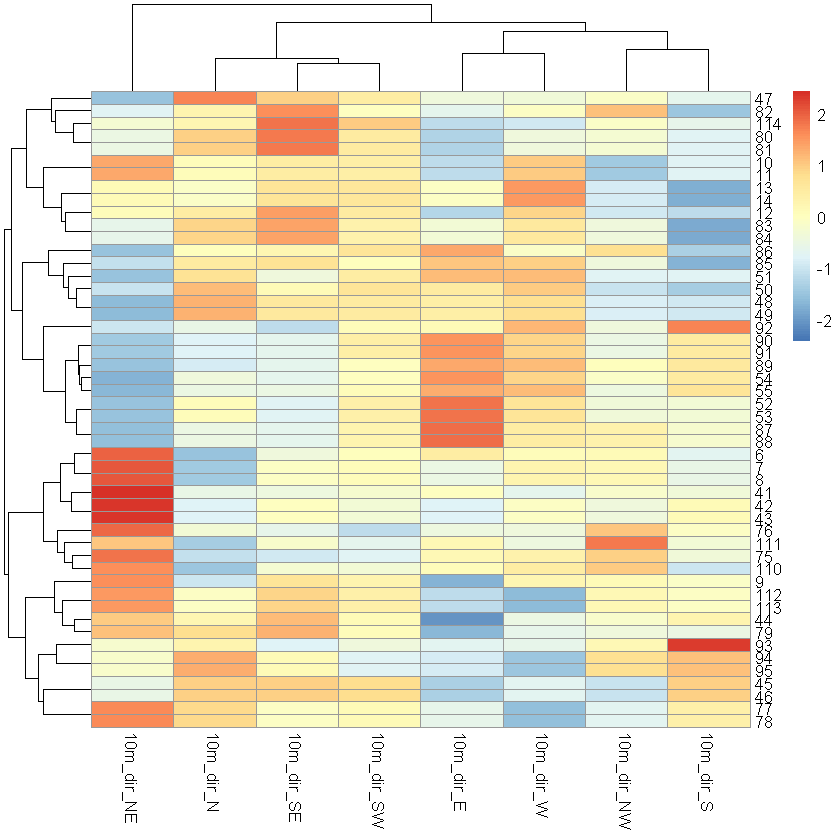

In [62]:
P = dane/sum(dane)
# Macierz częstości oczekiwanych
PP = outer(rowSums(P),colSums(P))
# Macierz residuów Pearsonowskich
E = (P-PP)/sqrt(PP)
head(E)
#pheatmap(E, scale = "row",show_rownames=FALSE,cluster_rows=FALSE)

pheatmap(E, scale = "row")


Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.142857  16.2  16.2  ****                     
 2      0.142857  16.2  32.5  ****                     
 3      0.142857  16.2  48.7  ****                     
 4      0.142857  16.2  64.9  ****                     
 5      0.142857  16.2  81.2  ****                     
 6      0.142857  16.2  97.4  ****                     
 7      0.022857   2.6 100.0  *                        
        -------- -----                                 
 Total: 0.880000 100.0                                 


Rows:
     name   mass  qlt  inr     k=1 cor ctr     k=2 cor ctr  
1  |    1 |   20  982   37 | -1235 963 218 |  -173  19   4 |
2  |    2 |   20  181    7 |   169  94   4 |  -162  86   4 |
3  |    3 |   20  181    7 |   169  94   4 |  -162  86   4 |
4  |    4 |   18    0    3 |     0   0   0 |     0   0   0 |
5  |    5 |   20  154   10 |   115  32   2 |   227 122   7 |
6  |    6 |   20  207   50 |  

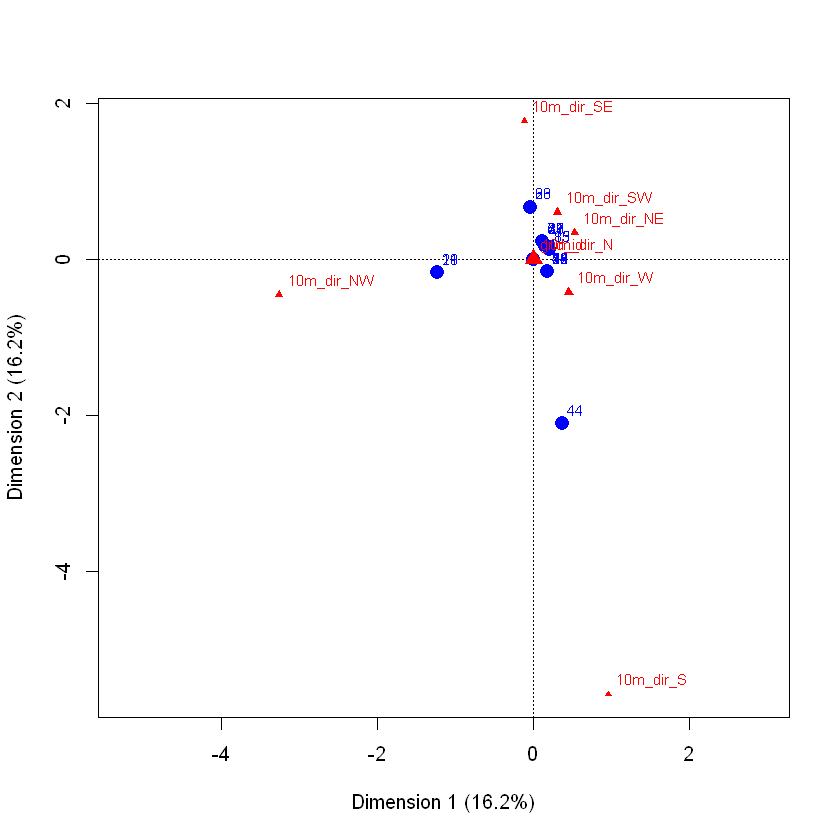

In [66]:
plot(ca(dane), mass=c(T,T))
summary(ca(dane))
